In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

In [68]:
data1 = pd.read_csv("C:/Users/Hp/Desktop/task/insurance.csv")

In [69]:
display(data1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [70]:
display(data1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [71]:
data1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [72]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [73]:
data1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [74]:

data1_dummies = pd.get_dummies(data1)
display(data1_dummies)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


Shape of the dataset is: (1338, 7)


<AxesSubplot:>

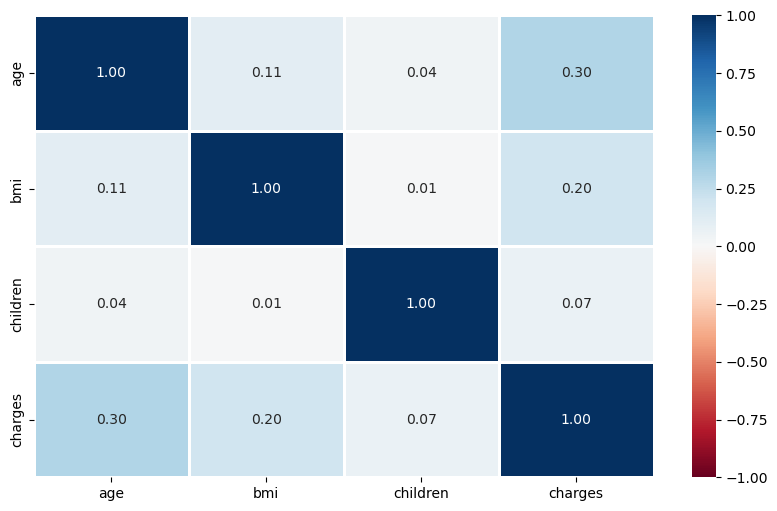

In [75]:
#Data Exploration
print("Shape of the dataset is: {}".format(data1.shape))
#Feature correlation
#We use a heatmap using seaborn library
plt.figure(figsize =(10, 6))
sns.heatmap(data1.corr(), cmap = 'RdBu', fmt = '.2f', linewidths = 2,vmin=-1, vmax=1, annot = True)

In [76]:
#Split the Data into Training and Test Data Sets
X = data1_dummies.drop('charges', axis = 1)
y = data1_dummies.iloc[:,3]


In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
sc = StandardScaler()
x_training_data = sc.fit_transform(X_train)
x_test_data = sc.fit_transform(X_test)

#Building a linear regression model for multiple features
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_training_data, y_train)

LinearRegression()

In [78]:
#Evaluating the models
print("Train accuracy score: {}".format(linear.score(x_training_data, y_train)))
print("Test accuracy score: {}".format(linear.score(x_test_data, y_test)))

Train accuracy score: 0.7449555328228536
Test accuracy score: 0.7675949374890565


In [79]:
#Try to use other metrics for evaluating a model
from sklearn.metrics import mean_squared_error, r2_score
y_pred = linear.predict(x_test_data)
print("Mean squred error: {}".format(mean_squared_error(y_test, y_pred)))
print("R2 score: {}".format(r2_score(y_test,y_pred)))
mean_squared_before = mean_squared_error(y_test, y_pred)
r2_score_before = r2_score(y_test, y_pred)

Mean squred error: 35067864.755386844
R2 score: 0.7675949374890565
